## Univariate Linear Regression using Gradient Descent Part 2
After observing the high accuracy from our previous model, we can conclude that the combined 5 features is a better predictor of the gold prices. However, does there exists a single variable that is able to very accurately predict gold price better than the previous 5 features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Nazrin99/GoldPricePredict/main/FINAL_USO.csv')

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [3]:
# Function to engineer the input feature, Exponential Moving Average (EMA)
def ema(data, day_range=7, smoothing_value=2):
    last_price = data['Adj Close'].to_numpy()

    ema = list()
    ema.append(sum(last_price[:day_range]) / day_range)

    for i in range(day_range, len(data)):
        ema.append((last_price[i] * (smoothing_value / (1 + day_range))) + ema[-1] * (1 - (smoothing_value / (1 + day_range))))

    print(f'length of ema: {len(ema)}')
    print(f'length of data: {len(data)}')
    data = data[:-day_range + 1]
    data.insert(0, "EMA", ema, True)

    return data

In [4]:
df = df[['Date', 'Adj Close']]

In [5]:
df

,Date,Adj Close
0,2011-12-15,152.330002
1,2011-12-16,155.229996
2,2011-12-19,154.869995
3,2011-12-20,156.979996
4,2011-12-21,157.160004
...,...,...
1713,2018-12-24,120.019997
1714,2018-12-26,119.660004
1715,2018-12-27,120.570000
1716,2018-12-28,121.059998


In [6]:
df = ema(df)
df

length of ema: 1712
length of data: 1718


,EMA,Date,Adj Close
0,155.559998,2011-12-15,152.330002
1,155.397499,2011-12-16,155.229996
2,154.305624,2011-12-19,154.869995
3,153.314217,2011-12-20,156.979996
4,152.983164,2011-12-21,157.160004
...,...,...,...
1707,118.630845,2018-12-14,117.059998
1708,118.888135,2018-12-17,117.870003
1709,119.308601,2018-12-18,118.150002
1710,119.746450,2018-12-19,117.430000


In [7]:
df.drop('Date', axis=1)

,EMA,Adj Close
0,155.559998,152.330002
1,155.397499,155.229996
2,154.305624,154.869995
3,153.314217,156.979996
4,152.983164,157.160004
...,...,...
1707,118.630845,117.059998
1708,118.888135,117.870003
1709,119.308601,118.150002
1710,119.746450,117.430000


In [8]:
x = df['EMA']
y = df['Adj Close']

In [9]:
# Training size
train_size = int(0.8 * y.shape[0])

In [10]:
# Define a LinearRegression model
class LinearRegression():
  def __init__(self):
    self.theta = np.array([0.0, 0.0])
    pass

  def train_gradient_descent(self, x, y, learning_rate=0.01, iterations=1000):

    m = y.shape[0]
    theta = self.theta.copy()

    costs_history = []

    for i in range(iterations):
      new_theta = [0 for _ in range(x.shape[1])]
      for n in range(len(new_theta)):
        new_theta[n] = theta[n] - learning_rate / m * np.sum((np.dot(x, theta) - y) * x[:, n])

      theta = np.array(new_theta)

      costs_history.append(self.compute_cost(x, y, theta))
      self.theta = theta

    return theta, costs_history

  def compute_cost(self, x, y, theta):
    m = y.size
    J = (1 / (2 * m)) * np.sum(np.square(np.dot(x, theta) - y))

    return J

  def feature_normalization(self, X):
    X_norm = X.copy()
    mean = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    for i in range(1, X.shape[1]):
      mean[i] = (np.mean(X_norm[:, i]))
      sigma[i] = (np.std(X_norm[:, i]))
      X_norm[:,i] = (X_norm[:, i] - mean[i]) / sigma[i]

    return X_norm, mean, sigma

  def predict_gradient_descent(self, X):
    return np.dot(X, self.theta)

In [11]:
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

In [12]:
x_train = np.stack([np.ones(x_train.shape[0]), x_train], axis=1)

model = LinearRegression()
x_train, mean, sigma = model.feature_normalization(x_train)
theta, J = model.train_gradient_descent(x_train, y_train)

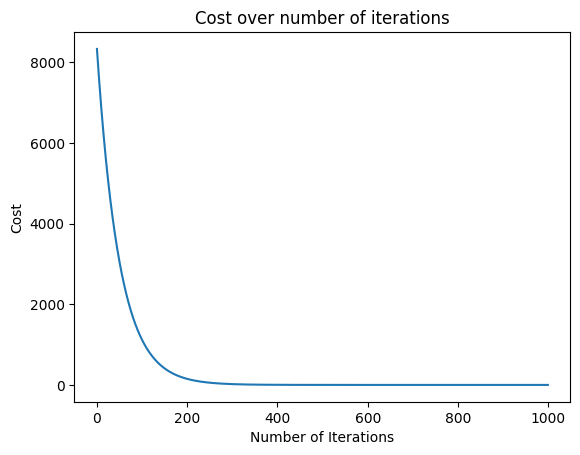

In [13]:
plt.plot(range(0, 1000), J)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost over number of iterations')
plt.show()

In [14]:
x_test.values.reshape([-1, 1])
x_test = np.stack([np.ones(x_test.shape[0]), (x_test - mean[1])/sigma[1]], axis=1)
y_pred = np.array(model.predict_gradient_descent(x_test))

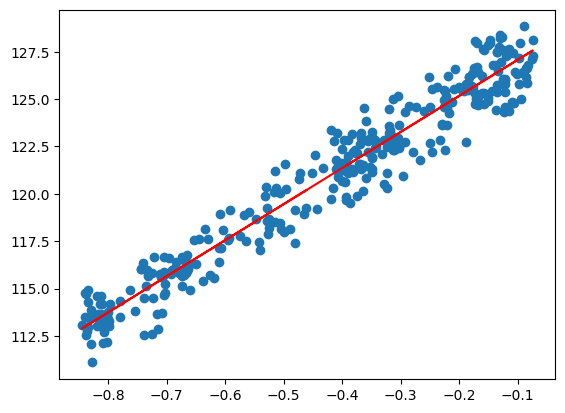

In [15]:
plt.plot(x_test[:, 1], y_pred, 'r')
plt.scatter(x_test[:, 1], y_test)

In [16]:
n_samples, _ = x_train.shape
n_samples_test, _ = x_test.shape

y_p_train = model.predict_gradient_descent(x_train)
y_p_test = model.predict_gradient_descent(x_test)

In [17]:
import math

error_train = math.sqrt((1 / n_samples) * np.sum((y_p_train - y_train) ** 2))
error_test = math.sqrt((1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2))


In [18]:
print(f'RMSE on training set: {np.round(error_train, 4)}')
print(f'RMSE on test set: {np.round(error_test)}')

RMSE on training set: 1.9456
RMSE on test set: 1.0


In [19]:
y_p_test_full = np.empty_like(df['Adj Close'])
y_p_test_full[:] = np.nan
y_p_test_full[len(y_p_train):] = y_p_test
y_p_test_full.shape

(1712,)

In [20]:
y_combine = np.concatenate((y_train,y_test),axis=0)
y_combine

array([152.330002, 155.229996, 154.869995, ..., 118.150002, 117.43    ,
       119.239998])

In [21]:
y_p_combine = np.concatenate((y_p_train,y_p_test),axis=0)
y_p_combine.shape

(1712,)

Text(0.5, 1.0, 'Adjusted Closing Price of Gold from 2011 to 2018')

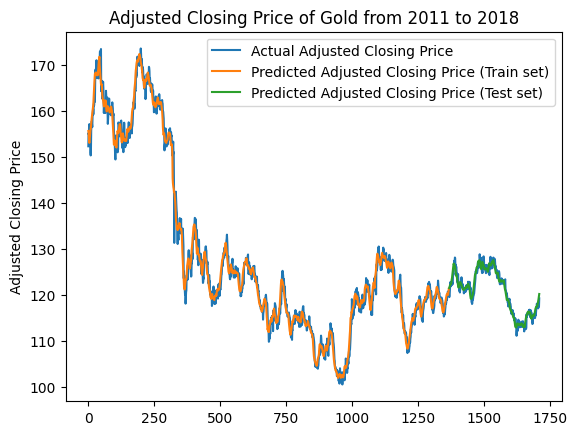

In [22]:
plt.plot(y_combine, label='Actual Adjusted Closing Price')
plt.plot(y_p_train, label='Predicted Adjusted Closing Price (Train set)')
plt.plot(y_p_test_full, label='Predicted Adjusted Closing Price (Test set)')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.title('Adjusted Closing Price of Gold from 2011 to 2018')